# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 


In [92]:
# %pip install pandas
# %pip install matplotlib

1- Envoltória Convexa (Gift Wrapping ??)
- Implementar primitiva de posição relativa de semiretas
- Sorted (default do python) com nossa primitiva
- Algoritmo da Envoltória (Gift Wrapping)
    - (conj. de pontos) -> (conj. de pontos)
- função para visualizar a envoltória

In [93]:
# imports

In [94]:
class Dot:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __lt__(self, b):
        A = (self.x)*(b.y)
        B = (self.y)*(b.x)
        return (A - B) > 0
    
    def __sub__(self, b):
        return Dot(self.x - b.x, self.y - b.y)
    
    def __add__(self, b):
        return Dot(self.x + b.x, self.y + b.y)

    def __repr__(self):
        return f'({self.x}, {self.y})'

In [95]:
class Endpoint:
    def __init__(self, dot:Dot, segmentIndx,  endpointType):
        # endpoit type = 'left' | 'right'
        self.dot = dot
        self.segmentIndx = segmentIndx
        self.endpointType = endpointType
    
    def __repr__(self):
        return f'({self.dot}, {self.segmentIndx}, {self.endpointType})'

    def __lt__(self, b):
        if self.dot.x == b.dot.x:
            if self.endpointType == b.endpointType:
                return self.dot.y < b.dot.y
            else:
                return True if self.endpointType == 'left' else False
        else: 
            return self.dot.x < b.dot.x

In [96]:
# Define a classe Seguimento
# O segmento terá um ponto a esquerda, a direita e um rotulo informando a qual poligono pertence

class Segment:
    def __init__(self, left:Dot, right:Dot, label):
        self.left = left
        self.right = right
        self.label = label

    def __repr__(self):
        return f'( {self.left} -> {self.right} )'

In [97]:
def sortDotsByPolarAngle(dotsParam):
    dots = dotsParam.copy()
    anchor = dots[0]
    indx = 0
    anchor_indx = indx
    # find anchor
    for p in dots:
        if p.y < anchor.y :
            anchor = p
            anchor_indx = indx
        elif (p.y == anchor.y and p.x < anchor.x) :
            anchor = p  
            anchor_indx = indx
        indx += 1

    # normalize dots
    norm_dots = []
    dots.pop(anchor_indx)
    for dot in dots:
        norm_dots.append(dot - anchor)
    
    norm_dots.sort()

    sorted_dots = [anchor]
    for dot in norm_dots:
        sorted_dots.append(dot + anchor)

    return sorted_dots

In [98]:
import random
def noise(x):
    return x + random.random()

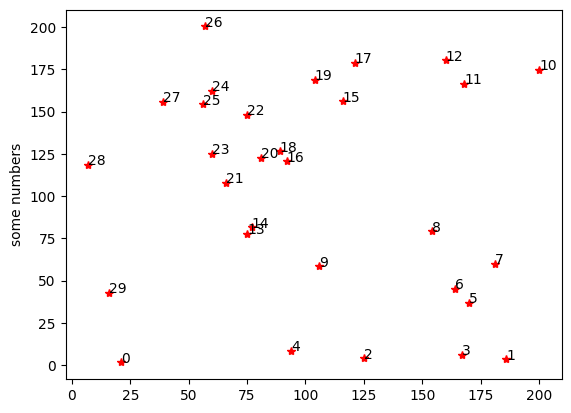

In [99]:
import matplotlib.pyplot as plt
from random import randint 
import random

dot_list = []

random.seed(16)
for i in range(30):
    x = randint(0,200)
    y = noise(randint(0,200))
    a = Dot(x, y)
    dot_list.append(a)

x = []
y = []

for e in sortDotsByPolarAngle(dot_list):
    x.append(e.x)
    y.append(e.y)

fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')
plt.show()


# Envoltória

In [100]:
def isLeftTurn(a, b, c):
    B = b - a
    C = c - a

    term1 = (B.x)*(C.y)
    term2 = (B.y)*(C.x)
    return (term1 - term2) > 0

In [101]:
def Graham(DotListParam):
    DotList = DotListParam
    stack = []
    stack.append(DotList[0])
    stack.append(DotList[1])
    stack.append(DotList[2])

    for i in range(3, len(DotList), 1):
        laster = len(stack) - 1
        while not isLeftTurn(stack[laster - 1], stack[laster], DotList[i]):
            stack.pop()
            laster -= 1
        stack.append(DotList[i])

    return stack

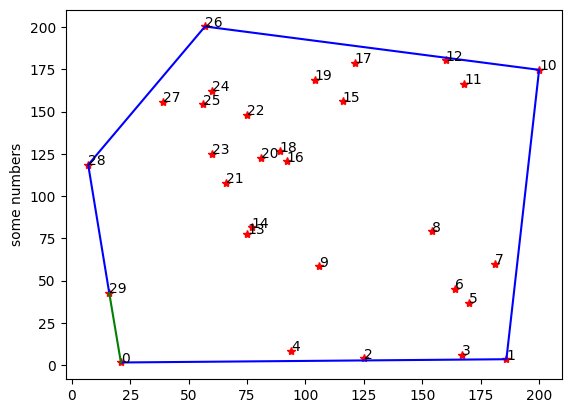

In [102]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')

x_envolt = []
y_envolt = []

sorted_list = sortDotsByPolarAngle(dot_list)

convexEnvelope = Graham(sorted_list)
for e in convexEnvelope:
    x_envolt.append(e.x)
    y_envolt.append(e.y)


ax.plot(x_envolt, y_envolt, 'b-')
ax.plot([x_envolt[len(x_envolt) - 1], x_envolt[0]], [y_envolt[len(y_envolt) - 1], y_envolt[0]], 'g-')
plt.show()

# Varredura

In [125]:
# Verifica se o ponto p3 está na semireta p1p2. 
# p1, p2 e p3 são colineares
def on_segment(p1:Dot, p2:Dot, p3:Dot):
    p1HasLessX = p1.x < p2.x 
    if p1HasLessX and p1.x <= p3.x and p2.x >= p3.x:
        return True
    if p2.x <= p3.x and p1.x >= p3.x:
        return True
    return False

In [104]:
def direction(a, b, c):
    # return 1 if turn left
    # return -1 if turn right
    # return 0 if is co-linear
    
    B = b - a
    C = c - a

    term1 = (B.x)*(C.y)
    term2 = (B.y)*(C.x)
    return (term1 - term2) 

In [105]:
def aux_segments_intersect(p1, p2, p3, p4):
    d1 = direction(p3, p4, p1)
    d2 = direction(p3, p4, p2)
    d3 = direction(p1, p2, p3)
    d4 = direction(p1, p2, p4)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and 0 > d2)) and ((d3 > 0 and d4 < 0) or  (d3 < 0 and d4 > 0)):
        return True
    if d1 == 0 and on_segment(p3, p4, p1):
        return True
    if d2 == 0 and on_segment(p3, p4, p2):
        return True
    if d3 == 0 and on_segment(p1, p2, p3):
        return True
    if d4 == 0 and on_segment(p1, p2, p4):
        return True
        
    return False

In [106]:
def segments_intersect(s1:Segment, s2:Segment):
    aux_segments_intersect(s1.left, s1.right, s2.left, s2.right)

In [107]:


# Sorting endpoints
endpoitsList:Endpoint = []
segmentsList:Segment = []
for i in range(len(convexEnvelope) - 1):
    a = convexEnvelope[i]
    b = convexEnvelope[i + 1]

    left = a if a.x < b.x else b
    right = a if a.x >= b.x else b
    s = Endpoint(left, i, 'left')
    e = Endpoint(right, i, 'right')

    endpoitsList.append(s)
    endpoitsList.append(e)

    segmentsList.append(Segment(left, right, '1'))

lastIndx = len(convexEnvelope) - 1
last = convexEnvelope[lastIndx]
first = convexEnvelope[0]

left = last if last.x < first.x else first
right = last if last.x >= first.x else first
s =  Endpoint(left, lastIndx, 'left')
e =  Endpoint(right, lastIndx, 'right')
endpoitsList.append(s)
endpoitsList.append(e)

segmentsList.append(Segment(left, right, '1'))


endpoitsList.sort()
# endpoitsList
# segmentsList

In [108]:
#%pip install bintrees

In [1]:
def isAbove(avl, key):
    if avl.__contains__(key):
        try:
            segment = avl.succ_item(key)[0] 
            return True, segment
        except:
            return False
    else:
        try:
            segment = avl.ceiling_item(key)[0]
            return True, segment
        except:
            return False

In [3]:
def isBelow(avl, key):
    if avl.__contains__(key):
        try:
            segment = avl.prev_item(key) 
            return True, segment
        except:
            return False
    else:
        try:
            segment = avl.floor_item(key)
            return True, segment
        except:
            return False
    

In [126]:
import bintrees

def sweepLineIntersection(endpoitsList, segmentsList):
    avl = [bintrees.AVLTree(), bintrees.AVLTree()]

    for p in endpoitsList:

        s = segmentsList[p.segmentIndx]
        
        # Insere o segmento na arvore
        if p.endpointType == 'left':
            avl[s.label].insert(s.left.y, s)

            aboveExist, otherSegment = isAbove(avl[s.label - 1], s.left.y)
            if (aboveExist):
                hasIntersection = segments_intersect(s, otherSegment)
                if (hasIntersection):
                    return True
            
            belowExist, otherSegment = isBelow(avl[s.label - 1], s.left.y)
            if (belowExist):
                hasIntersection = segments_intersect(s, otherSegment)
                if (hasIntersection):
                    return True
        
        # remoção do segmento
        else:
            aboveExist, aboveSegment = isAbove(avl, s.right.y, endpointType='right')
            belowExist, belowSegment = isAbove(avl, s.right.y, endpointType='right')
            hasIntersection = segments_intersect(aboveSegment, belowSegment)

            if (aboveExist and belowExist and hasIntersection):
                    return True
            avl[s.label].pop(s.right.y, False)
    return False



In [127]:
import bintrees

avl = bintrees.AVLTree([(2, 'one'), (5, 'five'), (9, 'nine'), (3, 'three'), (4, 'four')])

avl.floor_item(2)


# isBelow(avl, 1, endpointType='right')
# avl.prev_item(4)
sweepLineIntersection(endpoitsList, segmentsList)

False

Refazer: isAbove, para identificar se existe segmento acima quando o terminal for a direita. OK!

Refazer: isBelow, para identificar se existe segmento abaixo quando o terminal for a direita. OK!

onSegment: comparar dois segmentos consecultivos, que dará interceção 

sweepLineIntersection: interceção válida apenas para envoltórias diferentes! Mudar definição de endpoint!